# Gene annotations

Load gtf file and explore distribution and lengths of transcripts, introns and exons.

In [1]:
import pandas as pd
from splicevo.io.gene_annotation import GTFProcessor

# Define consistent genome colors
genome_colors = {
    'human': '#86c6f7',  # blue
    'mouse': '#ffae74'   # orange
}

# Load human gtf file
# Mazin et al.
gtf_path_human="/home/elek/sds/sd17d003/Anamaria/genomes/mazin/gtf/Homo_sapiens.gtf.gz"
chromosomes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'X', 'Y', 'MT']
# Gencode
gtf_path_human="/home/elek/sds/sd17d003/Anamaria/genomes/gencode/gtf/Homo_sapiens.gtf.gz"
chromosomes=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chrX', 'chrY', 'chrMT']


# Load mouse gtf file
# Mazin et al.
gtf_path_mouse="/home/elek/sds/sd17d003/Anamaria/genomes/mazin/gtf/Mus_musculus.gtf.gz"
chromosomes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'X', 'Y', 'MT']
# Gencode
gtf_path_mouse="/home/elek/sds/sd17d003/Anamaria/genomes/gencode/gtf/Mus_musculus.gtf.gz"
chromosomes=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chrX', 'chrY', 'chrMT']

# Process gtf
gtf_human = GTFProcessor(gtf_path_human)
gtf_mouse = GTFProcessor(gtf_path_mouse)
gtf_df_human = gtf_human.load_gtf(chromosomes=chromosomes)
gtf_df_mouse = gtf_mouse.load_gtf(chromosomes=chromosomes)

# Combine into joint dataframe, keeping track of the genome
gtf_df_human['genome'] = 'human'
gtf_df_mouse['genome'] = 'mouse'
gtf_df = pd.concat([gtf_df_human, gtf_df_mouse], axis=0)

/home/elek/miniforge3/envs/splicevo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading GTF file...
Loaded 3873451 GTF records
Loading GTF file...
Loaded 1892394 GTF records


In [2]:
# Optionally filter to protein coding genes only
gtf_df = gtf_df[gtf_df['gene_type']=='protein_coding']

## Transcripts

Plot histogram of transcript lengths

In [3]:
# Filter transcripts
trn_df = gtf_df[gtf_df['feature'] == 'transcript']

# Add transcript width
trn_df['width'] = trn_df['end'] - trn_df['start']
trn_df

/tmp/ipykernel_806702/349189866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn_df['width'] = trn_df['end'] - trn_df['start']


,chrom,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,hgnc_id,havana_gene,ont,protein_id,ccdsid,genome,mgi_id,width
2487,chr1,HAVANA,transcript,65419,71585,.,+,.,ENSG00000186092.7,protein_coding,...,NaN,OTTHUMT00000003223.4,HGNC:14825,OTTHUMG00000001094.4,NaN,ENSP00000493376.2,CCDS30547.2,human,NaN,6166
6558,chr1,HAVANA,transcript,450740,451678,.,-,.,ENSG00000284733.2,protein_coding,...,NA,OTTHUMT00000007999.3,HGNC:31275,OTTHUMG00000002860.3,NaN,ENSP00000409316.1,CCDS72675.1,human,NaN,938
7173,chr1,HAVANA,transcript,685716,686654,.,-,.,ENSG00000284662.2,protein_coding,...,NA,OTTHUMT00000007334.3,HGNC:15079,OTTHUMG00000002581.3,NaN,ENSP00000329982.2,CCDS41221.1,human,NaN,938
8431,chr1,HAVANA,transcript,923923,944574,.,+,.,ENSG00000187634.13,protein_coding,...,5,OTTHUMT00000316521.3,HGNC:28706,OTTHUMG00000040719.11,NaN,ENSP00000478421.2,CCDS90834.1,human,NaN,20651
8464,chr1,HAVANA,transcript,923923,944574,.,+,.,ENSG00000187634.13,protein_coding,...,5,NaN,HGNC:28706,OTTHUMG00000040719.11,NaN,ENSP00000480678.2,CCDS90833.1,human,NaN,20651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892134,chrY,HAVANA,transcript,89064075,89090284,.,+,.,ENSMUSG00000102045.2,protein_coding,...,5,OTTMUST00000122306.1,NaN,OTTMUSG00000047309.1,NaN,ENSMUSP00000140933.2,NaN,mouse,MGI:5434649,26209
1892209,chrY,HAVANA,transcript,89724693,89756801,.,-,.,ENSMUSG00000100608.3,protein_coding,...,1,OTTMUST00000122318.1,NaN,OTTMUSG00000047316.1,NaN,ENSMUSP00000141173.2,NaN,mouse,MGI:5440224,32108
1892234,chrY,HAVANA,transcript,89724697,89756791,.,-,.,ENSMUSG00000100608.3,protein_coding,...,NaN,NaN,NaN,OTTMUSG00000047316.1,NaN,ENSMUSP00000159671.1,NaN,mouse,MGI:5440224,32094
1892277,chrY,HAVANA,transcript,90412517,90444532,.,+,.,ENSMUSG00000096178.8,protein_coding,...,5,OTTMUST00000122361.1,NaN,OTTMUSG00000047352.1,NaN,ENSMUSP00000139688.2,NaN,mouse,MGI:5434193,32015


In [4]:
# Define consistent genome colors
genome_colors = {
    'human': '#86c6f7',  # blue
    'mouse': '#ffae74'   # orange
}

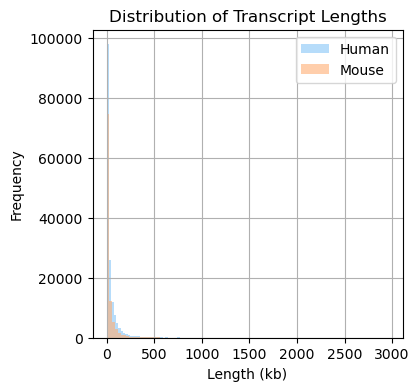

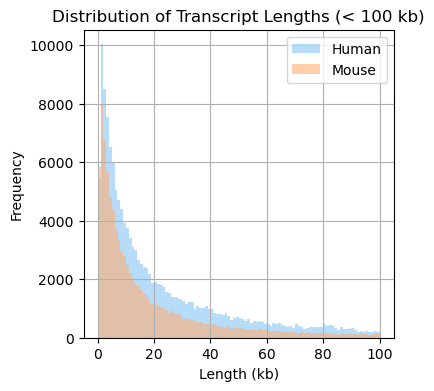

In [ ]:
# plot histogram of transcript lengths, grouped by genome
import matplotlib.pyplot as plt

human=trn_df[trn_df['genome'] == 'human']
mouse=trn_df[trn_df['genome'] == 'mouse']

plt.figure(figsize=(4, 4))
plt.hist(human['width']/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist(mouse['width']/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Transcript Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/transcript_lengths.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the transcripts < 100 kb
plt.figure(figsize=(4, 4))
plt.hist(human[human['width'] < 100000]['width']/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist(mouse[mouse['width'] < 100000]['width']/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Transcript Lengths (< 100 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/transcript_lengths_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

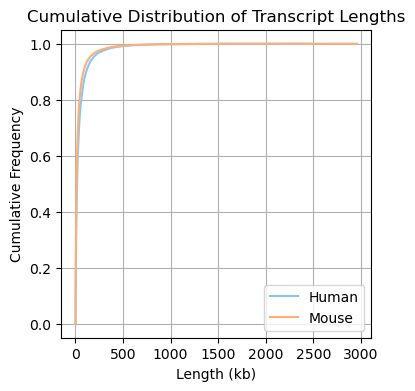

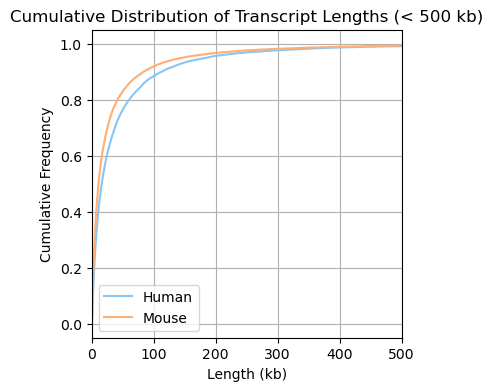

In [14]:
import numpy as np

# plot cumulative density lines of transcript lengths (no fill)
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.title('Cumulative Distribution of Transcript Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/transcript_lengths_cumulative_line.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the transcripts < 500 kb
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.xlim(0, 500)
plt.title('Cumulative Distribution of Transcript Lengths (< 500 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/transcript_lengths_cumulative_line_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

Exons

/tmp/ipykernel_806702/18147635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exons_df['width'] = exons_df['end'] - exons_df['start']


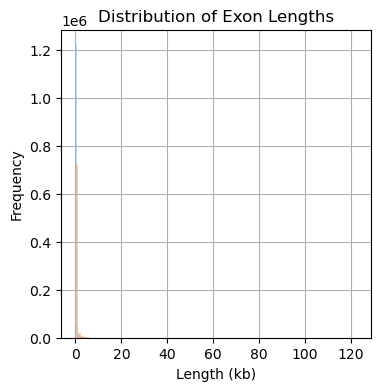

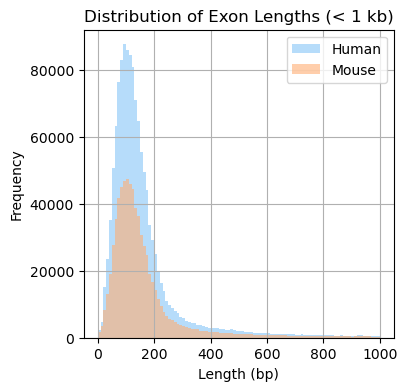

In [15]:
exons_df = gtf_df[gtf_df['feature'] == 'exon']
exons_df['width'] = exons_df['end'] - exons_df['start']

human=exons_df[exons_df['genome'] == 'human']
mouse=exons_df[exons_df['genome'] == 'mouse']

# Plot histogram of exon lengths
plt.figure(figsize=(4, 4))
plt.hist((human['width'])/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist((mouse['width'])/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Exon Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.savefig('plots/exon_lengths.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the exons < 10 kb
plt.figure(figsize=(4, 4))
plt.hist(human[human['width'] < 1000]['width'], bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist(mouse[mouse['width'] < 1000]['width'], bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Exon Lengths (< 1 kb)')
plt.xlabel('Length (bp)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/exon_lengths_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

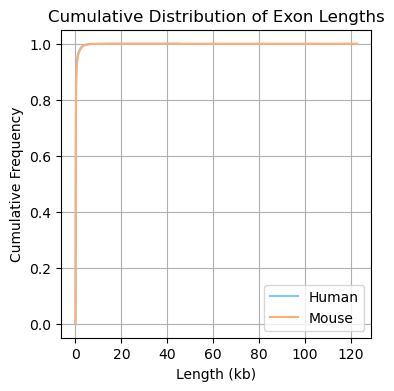

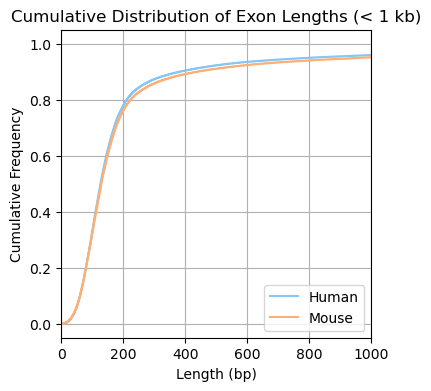

In [19]:
# Plot cumulative histogram of exon lengths
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.title('Cumulative Distribution of Exon Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/exon_lengths_cumulative.pdf', bbox_inches='tight', dpi=400)
plt.show()

# Zoom in on the exons < 1 kb
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'])
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.xlim(0, 1000)
plt.title('Cumulative Distribution of Exon Lengths (< 1 kb)')
plt.xlabel('Length (bp)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/exon_lengths_cumulative_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

Length of the transcribed region per transcript or gene (sum of exons).

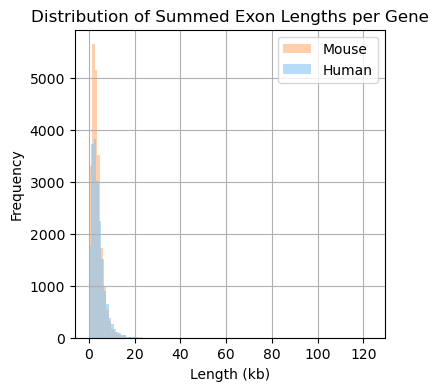

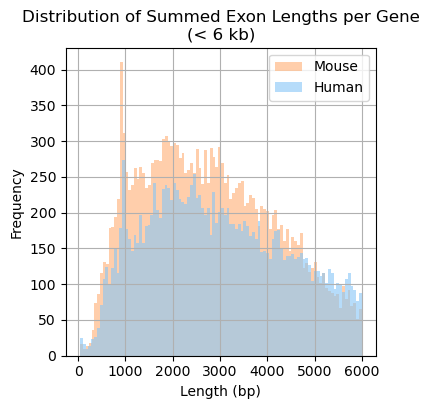

In [20]:
# sum exons per transcript
exon_sums = exons_df.groupby(['genome', 'gene_id', 'transcript_id']).agg({'width': 'sum'}).reset_index()

# sum exons per gene
exon_sums_gene = exons_df[['genome', 'gene_id', 'width']].groupby(['genome', 'gene_id']).agg({'width': 'sum'}).reset_index()

# sum exons of only one transcript per gene (the longest)
exon_sums_transcript = exons_df[['genome', 'gene_id', 'transcript_id', 'width']].groupby(['genome', 'gene_id', 'transcript_id']).agg({'width': 'sum'}).reset_index()
exon_sums_transcript = exon_sums_transcript.sort_values(['genome', 'gene_id', 'width'], ascending=[True, True, False])
exon_sums_transcript = exon_sums_transcript.groupby(['genome', 'gene_id']).first().reset_index()

human=exon_sums_transcript[exon_sums_transcript['genome'] == 'human']
mouse=exon_sums_transcript[exon_sums_transcript['genome'] == 'mouse']

# plot histogram of summed exon lengths per transcript, grouped by genome
plt.figure(figsize=(4, 4))
plt.hist(mouse['width']/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.hist(human['width']/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.title('Distribution of Summed Exon Lengths per Gene')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/summed_exon_lengths.pdf', bbox_inches='tight', dpi=400)
plt.show()
    
# zoom in on the summed exon lengths per transcript < 10 kb
plt.figure(figsize=(4, 4))
plt.hist(mouse[mouse['width'] < 6000]['width'], bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.hist(human[human['width'] < 6000]['width'], bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.title('Distribution of Summed Exon Lengths per Gene\n(< 6 kb)')
plt.xlabel('Length (bp)')
plt.ylabel('Frequency') 
plt.grid()
plt.legend()
plt.savefig('plots/summed_exon_lengths_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()



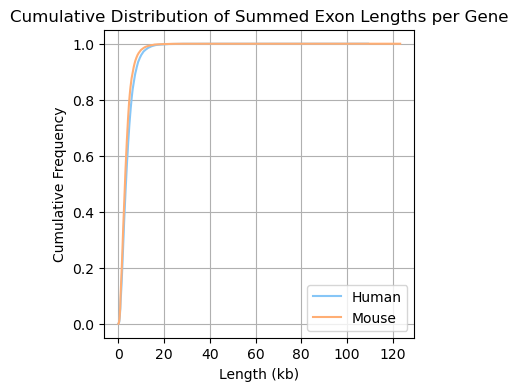

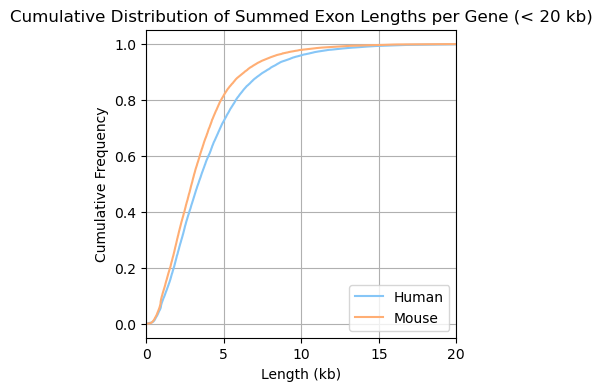

In [23]:
# Cumulative histogram of summed exon lengths per transcript
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.title('Cumulative Distribution of Summed Exon Lengths per Gene')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/summed_exon_lengths_cumulative.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the summed exon lengths per transcript < 20 kb
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human, genome_colors['human']), ('Mouse', mouse, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.xlim(0, 20)
plt.title('Cumulative Distribution of Summed Exon Lengths per Gene (< 20 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/summed_exon_lengths_cumulative_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

Length of transcribed regions for differrent gene biotypes.

In [24]:
gtf_df[gtf_df['feature'] == 'transcript'][['genome', 'gene_id', 'gene_type']].drop_duplicates()

,genome,gene_id,gene_type
2487,human,ENSG00000186092.7,protein_coding
6558,human,ENSG00000284733.2,protein_coding
7173,human,ENSG00000284662.2,protein_coding
8431,human,ENSG00000187634.13,protein_coding
8736,human,ENSG00000188976.11,protein_coding
...,...,...,...
1891911,mouse,ENSMUSG00000099856.2,protein_coding
1891975,mouse,ENSMUSG00000101915.3,protein_coding
1892134,mouse,ENSMUSG00000102045.2,protein_coding
1892209,mouse,ENSMUSG00000100608.3,protein_coding


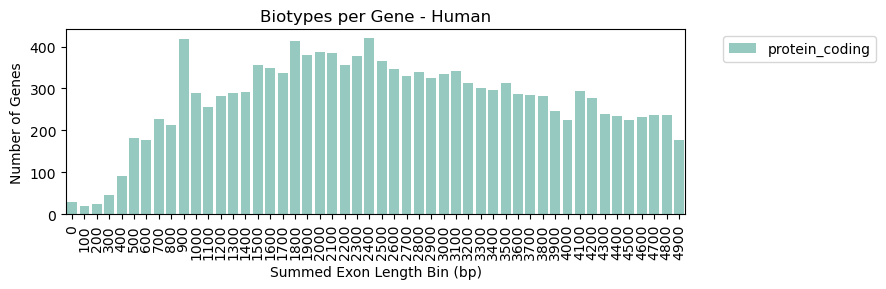

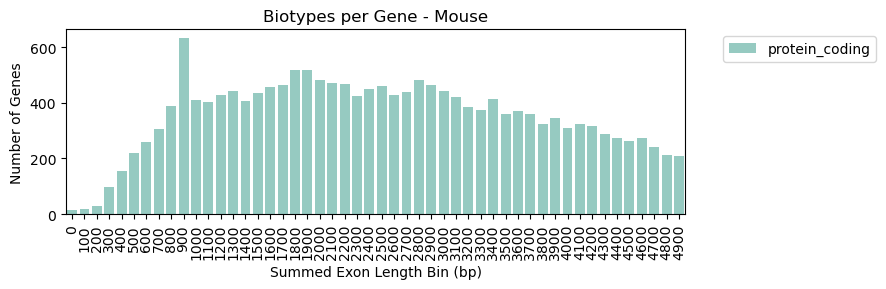

In [25]:
# number of biotypes per gene for genes groupped by summed expn length in bins of 100 bp
exon_sums['length_bin'] = (exon_sums['width'] // 100) * 100
exon_sums_biotype_counts=gtf_df[gtf_df['feature'] == 'transcript'][['genome', 'gene_id', 'gene_type']].drop_duplicates()
# one transcript per gene (the longest)
exon_sum_lengths = exon_sums.sort_values(['genome', 'gene_id', 'width'], ascending=[True, True, False]).groupby(['genome', 'gene_id']).first().reset_index()[['genome', 'gene_id', 'length_bin']]
# merge to get length bin per gene
exon_sums_biotype_counts=exon_sums_biotype_counts.merge(
    exon_sum_lengths, 
    on=['genome', 'gene_id'], how='left')
exon_sums_biotype_counts=exon_sums_biotype_counts.groupby(['genome', 'gene_type', 'length_bin'])['length_bin'].count().reset_index(name='biotype_count')
exon_sums_biotype_counts.sort_values(['genome', 'length_bin', 'biotype_count'])

# subset datat to plot
to_plot = exon_sums_biotype_counts[(exon_sums_biotype_counts['length_bin'] < 5000) & (exon_sums_biotype_counts['biotype_count'] > 10)]

# barplot of number of biotypes per gene for genes groupped by summed expn length in bins of 100 bp
# keep the same color palette for both genomes
import seaborn as sns
gene_types = to_plot['gene_type'].unique()
palette = sns.color_palette("Set3", len(gene_types))
color_map = {gene_type: palette[i % len(palette)] for i, gene_type in enumerate(gene_types)}
for genome in ['human', 'mouse']:
    plt.figure(figsize=(9, 3))
    subset = to_plot[to_plot['genome'] == genome]
    sns.barplot(data=subset, x='length_bin', y='biotype_count', hue='gene_type', palette=color_map)
    plt.xlabel('Summed Exon Length Bin (bp)')
    plt.ylabel('Number of Genes')
    plt.title(f'Biotypes per Gene - {genome.capitalize()}')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'plots/biotype_counts_{genome}.pdf', bbox_inches='tight', dpi=400)
    plt.show()

## Introns

In [26]:
# introns lengths
import pandas as pd

def get_introns_from_exons(exons_df):
    # group by transcript_id
    introns_list = []
    for (transcript_id, genome), group in exons_df.groupby(['transcript_id', 'genome']):
        # sort by start position
        group = group.sort_values('start')
        # get introns
        for i in range(len(group) - 1):
            intron_start = group.iloc[i]['end'] + 1
            intron_end = group.iloc[i + 1]['start'] - 1
            if intron_end > intron_start:
                introns_list.append({
                    'transcript_id': transcript_id,
                    'genome': genome,
                    'chromosome': group.iloc[i]['chrom'],
                    'start': intron_start,
                    'end': intron_end,
                    'width': intron_end - intron_start + 1
                })
    introns_df = pd.DataFrame(introns_list)
    return introns_df

introns_df = get_introns_from_exons(exons_df)
introns_df

,transcript_id,genome,chromosome,start,end,width
0,ENSMUST00000000001.5,mouse,chr3,108016633,108016718,86
1,ENSMUST00000000001.5,mouse,chr3,108016929,108019250,2322
2,ENSMUST00000000001.5,mouse,chr3,108019405,108019788,384
3,ENSMUST00000000001.5,mouse,chr3,108019919,108023078,3160
4,ENSMUST00000000001.5,mouse,chr3,108023208,108025616,2409
...,...,...,...,...,...,...
1825661,ENST00000850823.1,human,chrY,57190081,57190203,123
1825662,ENST00000850823.1,human,chrY,57190376,57190968,593
1825663,ENST00000850823.1,human,chrY,57191086,57191797,712
1825664,ENST00000850823.1,human,chrY,57192000,57192602,603


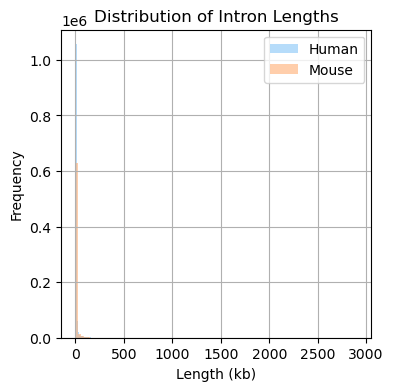

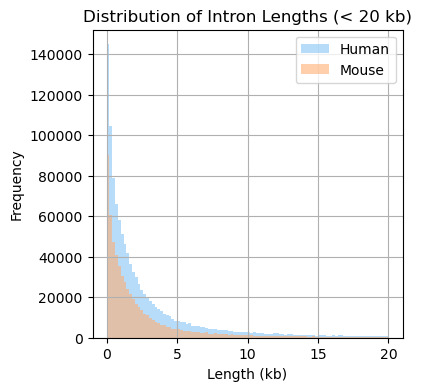

In [27]:
# plot histogram of intron lengths
import matplotlib.pyplot as plt

human_introns = introns_df[introns_df['genome'] == 'human']
mouse_introns = introns_df[introns_df['genome'] == 'mouse']

plt.figure(figsize=(4, 4))
plt.hist(human_introns['width']/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist(mouse_introns['width']/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Intron Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.savefig('plots/intron_lengths.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the introns < 100 kb
plt.figure(figsize=(4, 4))
plt.hist(human_introns[human_introns['width'] < 20000]['width']/1000, bins=100, alpha=0.6, label='Human', color=genome_colors['human'])
plt.hist(mouse_introns[mouse_introns['width'] < 20000]['width']/1000, bins=100, alpha=0.6, label='Mouse', color=genome_colors['mouse'])
plt.title('Distribution of Intron Lengths (< 20 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.savefig('plots/intron_lengths_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()

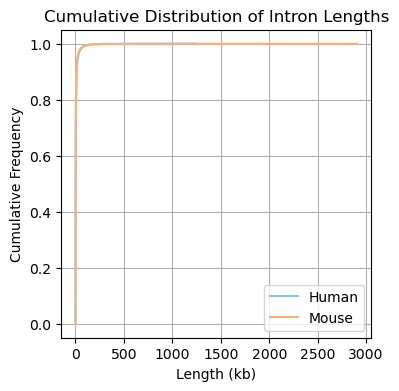

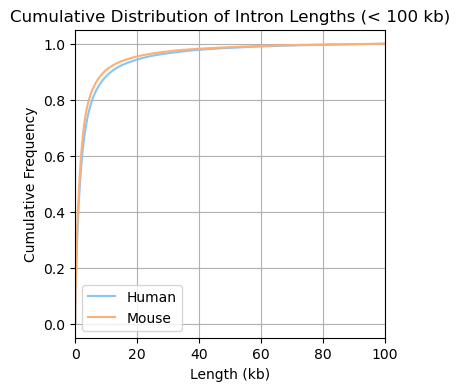

In [ ]:
# cumulative density plot of intron lengths
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human_introns, genome_colors['human']), ('Mouse', mouse_introns, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.title('Cumulative Distribution of Intron Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/intron_lengths_cumulative.pdf', bbox_inches='tight', dpi=400)
plt.show()

# zoom in on the introns < 100 kb
plt.figure(figsize=(4, 4))
for label, df, color in [('Human', human_introns, genome_colors['human']), ('Mouse', mouse_introns, genome_colors['mouse'])]:
    sorted_lengths = np.sort(df[df['width'] < 100000]['width'] / 1000)
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cdf, label=label, color=color)
plt.xlim(0, 100)
plt.title('Cumulative Distribution of Intron Lengths (< 100 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Cumulative Frequency')
plt.grid()
plt.legend()
plt.savefig('plots/intron_lengths_cumulative_zoomed.pdf', bbox_inches='tight', dpi=400)
plt.show()